# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import probplot
from scipy.stats.mstats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set_style("darkgrid")

df = pd.read_csv('data/human_body_temperature.csv')

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Is the Distribution Normal?

Firstly, we want to check if the distribution of the sample is normal. While this is not a requirement for the Central Limit Theorem (or CLT) to hold, it gives us an idea of whether the sample is representative of the population.

It is common knowledge that most data that occurs in nature (including human temperature) follow a normal distribution. Intuitively too, it is reasonable enough to assume that this is the case. We would expect the temperature to be hovering over a certain mean and the number of cases beyond a certain number of standard deviations to be extremely rare.

The easiest way to do this is by using the normaltest method available in scipy.stats. 

The normaltest of a distribution returns a tuple: the first value is the chi-squared statistic and the second is the p-value. If the p-value is above a certain threshold (say, 0.05), we can assume that the distribution in hand is a normal distribution.

In [3]:
# Your work here.
temperatures = df['temperature']
stats.normaltest(temperatures)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The p-value obtained is approximately 0.258 which is much greater than 0.05. Therefore, **the temperatures is a normal distribution.**

To further our claims, we will plot the data in a histogram and construct a quantile plot. The results are shown below.

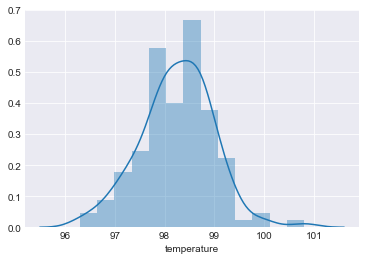

In [4]:
sns.distplot(temperatures)

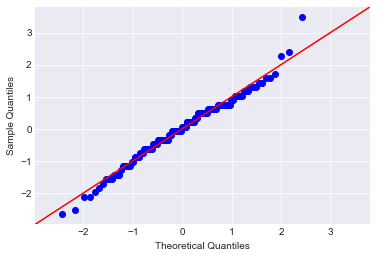

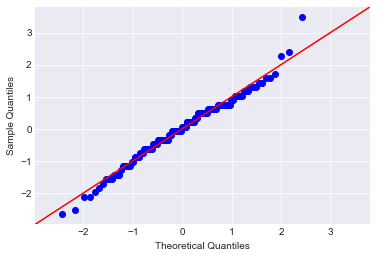

In [10]:
zscores = zscore(temperatures)

sm.qqplot(zscores, line='45')

As can be seen from the histogram and the normality quantile plot above, the distribution is indeed normal in nature. The seaborn histogram plot shows us that the distribution is normal as the frequency of values decrease exponentially as we move away from the mean.

Also, the quantile plot of Z-score versus the temperature is a straight line which strenghtens our claim. The mathematical and the graphical tests together make a very compelling case of the given sampled distribution being normal.

### Conclusions
* The sampled distribution is normal
* There is evidence indicating that the sample distrbution is a good representative of the population

## Sample Size and Independence of Observations

In [36]:
len(df)

130

As we can see above, the number of rows in the dataframe is 130.
According to the Central Limit Theorem, we require at least 30 samples to satisfy the CLT conditions.

Since our sample size is much larger than 30, we can safely say that the sample size is large enough.

The observations are that of temperature and heart rate of a particular person. 
It can be safely assumed that the measurements of temperature and heartbeat for one person is not affected by the measurements of another person.
Furhtermore, we have already discovered that the sampled distrbution is normal and this led us to conclude that the distribution is a good representation of the population.

### Conclusions
* The sample size is large enough. We can apply z-statistics for hypothesis testing.
* The samples are statistically independent

## Tests About A Population Mean

We do not have data about the true population mean as it is not possible to sample the entire population.

However, we can perform a hypothesis test and calculate the appropriate p-value for the test. If it is below a threshold (say, p= 0.05), we can reject the hypothesis and if it is greater, we can accept it.

For the purpose of this test, we define:

* **Null Hypothesis:** The true population mean is 98.6 degrees F.
* **Alternate Hypothesis:** The true population mean is not 98.6 degrees F.

Assuming Null Hypothesis (H0) is true,

Since we have assumed the null hypothesis as true, it follows that the sample distribution mean is the same as the true population mean.

In [40]:
true_mean = 98.6
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()
sigma_x = sample_std/np.sqrt(len(df))

sample_mean, sample_std, sigma_x

(98.249230769230749, 0.73318315803894563, 0.064304416837891024)

We have now obtained the values of the sample mean, the sample standard deviation and the sigma_x value.

The next step is to check how many standard deviations away is 98.6 (true mean) from 98.25 (sample mean).

In [41]:
z = (98.6 - sample_mean) / sigma_x
z

5.4548232923645195

In [42]:
p = (1-stats.norm.cdf(z))*2
p

4.9021570136531523e-08

The p-value obtained is extremely small. If the null hypothesis was indeed true, the p-value would have been much greater. We can thus safely disregard the null hypothesis.

The true population mean is NOT 98.6F.

We used the one-sample test for this problem. This is because we were comparing the sample mean to a known value (98.6) and trying to find out if the true mean temperature of humans is actually 98.6F.

In this situation, it is more appropriate to use z-statistic. This is because the sample size is greater than 30, thus satisfying the conditions for applying Central Limit Theorem.

### Conclusions

* The p-value is extremely small. Therefore, we can **reject the null hypothesis**.
* The sample size is greater than 30. Hence, using the **z-statistic** is more appropriate.
* We are comparing the sample mean to known value of population mean. Hence, the **one sample test** is more appropriate.
* We are interested in knowing if the p-value on both sides of the tail. Therefore, we use the **two-tailed test**.

## Applying T-Statistic

In the previous section, we noted that the Z-Statistic is the more appropriate test to use in lieu of the sample size. In this section, we will apply the t-statistic to see if our results still hold and compare the p-values obtained in both the cases.

In [43]:
t = z
t

5.4548232923645195

In [44]:
(1 - stats.t.cdf(t, len(df)-1))*2

2.4106320428707306e-07

The p-value obtained by applying the t-statistic is also extremely small. Hence, the null hypothesis is rejected even in this case and all the conclusions arrived at using z-statistics hold.

The result is the same because for sample sizes greater than 30, the z-statistic and the t-statistic yield approximately the same results.

### Conclusions

* The p-value for the t-statistic is ten times larger than the p-value of the z-statisitc. 
* However, it is still extremely small. Therefore, we can safely reject the null hypothesis.
* All the conclusions arrived at with z-statistics also hold with the t-statistics.

## Abnormality of Temperatures

Let us first calculate the true mean of human temperature with a confidence interval of 95%. Since, we've already calculated the sample mean, sample standard deviation and sigma_x, this step should be fairly straightforward.

In [46]:
z0 = stats.norm.ppf(0.975)

upper_temp = sample_mean + z0*sigma_x
lower_temp = sample_mean - z0*sigma_x

lower_temp, upper_temp

(98.123196428181629, 98.375265110279869)

From the above results, we are 95% confident that the true mean is somewhere between 98.123F and 98.375F. The margin of error is 10%. Therefore, we can consider any temperature outside this range to be abnormal.

### Conclusion
A body temperature below 98.123 and above 98.375 should be considered abnormal.

## Comparing Male and Female Body Temperatures

For the next part, we are going to find out if there is a statistically significant difference in temperature of men and women.

In [47]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

len(df_male), len(df_female)

(65, 65)

We have partitioned our dataframe into two separate dataframes based on gender. Each child dataframe consists of 65 samples each. Since the sample sizes for both dataframes are greater than 30, this implies Central Limit Theorem holds and we can apply z-statistics.

In [48]:
male_temps = df_male['temperature']
female_temps = df_female['temperature']

In [49]:
male_mean = male_temps.mean()
male_std = male_temps.std()

male_mean, male_std

(98.104615384615371, 0.69875576232659098)

In [50]:
female_mean = female_temps.mean()
female_std = female_temps.std()

female_mean, female_std

(98.393846153846141, 0.74348775273136636)

From the above calculations, it can be seen that the mean and the standard deviations of male and female temperatures differ slightly. The next step is to determine if this difference is a statistically significant one.

For hypothesis testing, the following are defined:

* **Null Hypothesis:** The true mean temperature for men and women are the same.
* **Alternate Hypothesis:** The true mean temperature for men and women are not the same.

The threshold value of $\alpha$ is assumed to be 0.05.
Assuming Null Hypothesis is true.

In [51]:
h0_mean = 0
mean_diff = female_mean - male_mean
sigma_diff = np.sqrt((female_std**2)/len(female_temps)  + (male_std**2)/len(male_temps))
mean_diff, sigma_diff

(0.28923076923076962, 0.12655395041982645)

In [52]:
z = (mean_diff - h0_mean) / sigma_diff
z

2.2854345381656103

In [53]:
p = (1-stats.norm.cdf(z))*2
p

0.022287360760657515

The p-value obtained in this case is 0.02 which is less than the accepted threshold of 0.05.

Therefore, we have to reject the null hypothesis and accept the alternate hypothesis. In other words, **there is a significant difference in male and female body temperatures.**

For this test, two-sample test was used as we were trying to compare the means of two different groups. Also, the z-statistic was used as the sample sizes for both groups were greater than 30.

## Conclusions

1. The distribution of human temperatures is normal and can be modeled as a Gaussian distribution.
2. The human temperatures are statistically independent.
3. We are reasonably confident that the mean temperature of the human body is not 98.6F. This is done by hypothesis testing and calculating the corresponding z-statistic.
4. The z-statistic and t-statsitic yield similar results for sample sizes greater than 30.
5. Male and female body temperatures differ significantly to be of statistical importance.